In [17]:
import numpy as np
import pandas as pd
%matplotlib inline 
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

X_train = pd.read_csv('./X_train.csv', index_col=0)
X_test = pd.read_csv('./X_test.csv', index_col=0)
y_train = pd.read_csv('./y_train.csv', index_col=0)
y_test = pd.read_csv('./y_test.csv', index_col=0)

In [2]:
X_train.head()

,Unique_County,Unique_States,Avg_AdmissionDuration,Avg_ClaimDuration,Avg_Total_ClmProcedureCode,Avg_Total_ClmDiagnosisCode,DiagnosisGroupCode_count,Unique_DiagnosisGroupCode,ClmAdmitDiagnosisCode_count,Unique_ClmAdmitDiagnosisCode,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Age_20-30,Age_30-40,Age_40-50,Age_50-60,Age_60-70,Age_70-80,Age_80-90,Age_90-101
3593,-0.726554,-0.625131,2.348460,1.933499,3.433855,1.468203,-0.256642,-0.249839,-0.468208,-0.522145,...,0.45,0.00,0.00,0.00,0.00,0.18,0.18,0.27,0.36,0.00
2495,0.038377,0.272537,-0.076676,-0.354683,-0.119036,-0.082437,0.667357,0.788190,0.240953,0.460143,...,0.28,0.12,0.01,0.02,0.01,0.04,0.22,0.38,0.21,0.12
952,-0.344089,-0.625131,0.668451,0.869776,0.385406,0.537213,-0.212642,-0.196607,-0.442263,-0.537988,...,0.22,0.09,0.00,0.03,0.03,0.06,0.06,0.44,0.28,0.09
1910,0.038377,-0.400714,0.996046,0.844569,0.760366,1.191422,0.315357,0.335716,-0.174165,-0.031001,...,0.39,0.10,0.00,0.00,0.02,0.06,0.22,0.51,0.16,0.04
2219,2.078190,3.863209,-0.210402,-0.251295,-0.272617,-0.231894,1.327356,1.506826,1.071190,1.394900,...,0.32,0.11,0.01,0.02,0.02,0.07,0.18,0.34,0.28,0.09


In [3]:
X_train.shape

(6865, 35)

In [4]:
X_test.shape

(2943, 35)

In [5]:
y_train = pd.Series(y_train['PotentialFraud'], dtype='int32')

In [6]:
y_test = pd.Series(y_test['PotentialFraud'], dtype='int32')

In [24]:
param_grid_gbc = [{
    "n_estimators": [1000, 2000, 3000],
   "learning_rate":np.linspace(0.1, 1, 10),
    "min_samples_split": range(2, 10),
    "max_features": list(range(5, 40, 5)),
    "max_depth": range(5, 35, 5)
}]

In [25]:
# gbc= GradientBoostingClassifier(random_state=1) # TOOK FOREVER ~ 50400 fits lol

# from sklearn.model_selection import GridSearchCV, KFold 
# gbc_Grid = GridSearchCV(gbc, param_grid_gbc, scoring='roc_auc',cv=KFold(shuffle= True, random_state=1),verbose=2, n_jobs=-1)
# gbc_Grid.fit(X_train, y_train)

In [27]:
gbc= GradientBoostingClassifier(random_state=1)

from sklearn.model_selection import RandomizedSearchCV
gbc_RandomGrid = RandomizedSearchCV(estimator = gbc, param_distributions = param_grid_gbc, cv=KFold(shuffle= True, random_state=1), verbose=2, n_jobs=-1, random_state=1, scoring='roc_auc')

In [28]:
gbc_RandomGrid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 18.4min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=GradientBoostingClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions=[{'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                         'max_depth': range(5, 35, 5),
                                         'max_features': [5, 10, 15, 20, 25, 30,
                                                          35],
                                         'min_samples_split': range(2, 10),
                                         'n_estimators': [1000, 2000, 3000]}],
                   random_state=1, scoring='roc_auc', verbose=2)

In [29]:
print(gbc_RandomGrid.best_params_)
print(gbc_RandomGrid.best_score_) # CV score 
print("*****")
print(gbc_RandomGrid.score(X_train, y_train))
print(gbc_RandomGrid.score(X_test, y_test))
# {'learning_rate': 0.56, 'max_depth': 25, 'max_features': 5, 'min_samples_leaf': 6, 'min_samples_split': 8, 'n_estimators': 1500}

{'n_estimators': 2000, 'min_samples_split': 6, 'max_features': 20, 'max_depth': 25, 'learning_rate': 0.8}
0.999829823712644
*****
0.9999999999999999
1.0


In [31]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = gbc_RandomGrid.best_estimator_.predict(X_test) 
cm_gbc_Random = confusion_matrix(y_true, y_pred)
cm_gbc_Random

array([[1472,    3],
       [   0, 1468]], dtype=int64)

Text(24.0, 0.5, 'Actual Value')

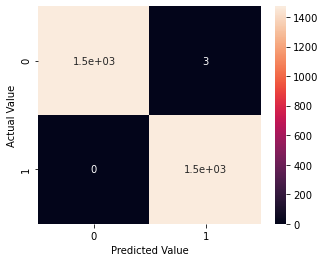

In [32]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_gbc_Random, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [33]:
# Feature Importance
gbc_final = gbc_RandomGrid.best_estimator_
feature_importance = list(zip(X_train.columns, gbc_final.feature_importances_))
sorted(feature_importance, key=lambda imp: imp[1], reverse=True)

[('ClmAdmitDiagnosisCode_count', 0.3424260508067219),
 ('Unique_DiagnosisGroupCode', 0.1675570930155979),
 ('Claim_count', 0.07302225469863596),
 ('DiagnosisGroupCode_count', 0.054260867935799546),
 ('Avg_AdmissionDuration', 0.029393360659248996),
 ('Avg_Total_Physician', 0.028953961327483124),
 ('Avg_TotalClaimCost_PerPatient', 0.024204798361017944),
 ('Unique_States', 0.021717007937061255),
 ('Unique_patients', 0.01607643166834622),
 ('Avg_ClaimDuration', 0.015595961902458017),
 ('Unique_County', 0.015344456055509654),
 ('Age_90-101', 0.015143091383699576),
 ('RenalDiseaseIndicator', 0.014273759842482699),
 ('Avg_Total_ClmDiagnosisCode', 0.01269529744666815),
 ('ChronicCond_stroke', 0.012630156407657831),
 ('Age_70-80', 0.011999667612456702),
 ('ChronicCond_Heartfailure', 0.011045547389159081),
 ('Age_80-90', 0.011006348513119412),
 ('Avg_TotalClaimCost', 0.010430630339310756),
 ('ChronicCond_Alzheimer', 0.010234917412520658),
 ('ChronicCond_KidneyDisease', 0.009417093605368302),
 ('

<BarContainer object of 35 artists>

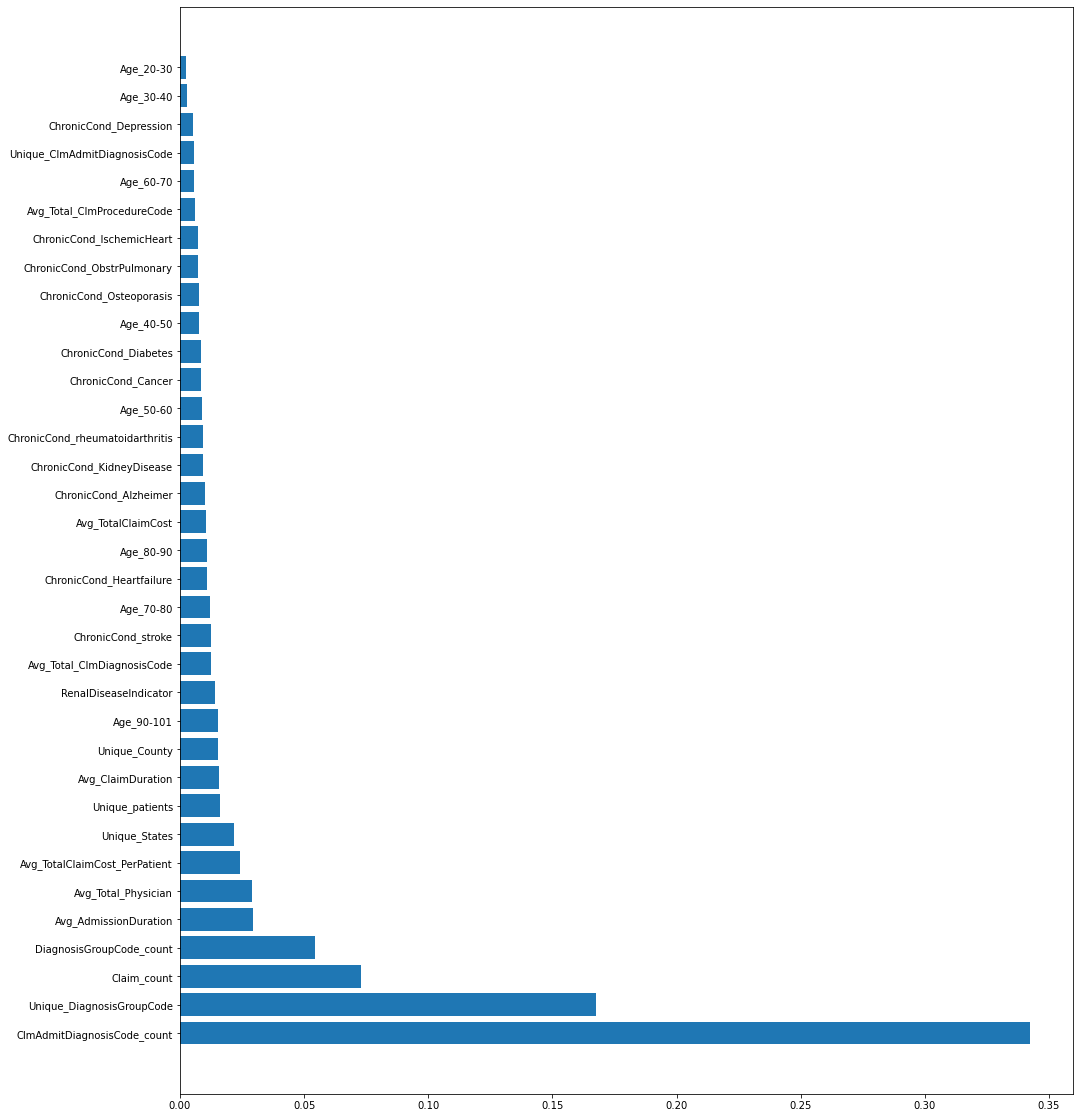

In [34]:
features, importance = zip(*sorted(feature_importance, key=lambda imp: imp[1], reverse=True))
plt.figure(figsize=(16,20))
plt.barh(features, importance)